# Statistics Basics — Solutions

This notebook contains worked solutions corresponding to the exercises notebook.

## 0. Setup

In [4]:
# Setup: run this cell first
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# for consistent random examples (you may change the seed)
rng = np.random.default_rng(42)

pd.set_option('display.precision', 3)


In [5]:
# Generate a small synthetic dataset for exercises
#
# Columns:
# - age (numeric)
# - salary (numeric)
# - department (categorical nominal)
# - satisfaction (categorical ordinal: 'Poor' < 'Fair' < 'Good' < 'Excellent')
# - clicks (binary numeric: 0/1)
# - orders_per_day (count; can be modeled as Poisson-ish)
#
n = 50
ages = rng.normal(35, 8, size=n).round().astype(int)
salaries = rng.normal(55000, 12000, size=n).round(2)
departments = rng.choice(['Sales', 'Marketing', 'Engineering', 'HR'], size=n)
satisfaction_levels = rng.choice(['Poor', 'Fair', 'Good', 'Excellent'], size=n, p=[0.15, 0.25, 0.4, 0.2])
clicks = rng.integers(0, 2, size=n)
orders_per_day = rng.poisson(lam=5, size=n)

df = pd.DataFrame({
    'age': ages,
    'salary': salaries,
    'department': departments,
    'satisfaction': satisfaction_levels,
    'click': clicks,
    'orders_per_day': orders_per_day
})

# An intentionally skewed variable for median vs. mean demo
# few very high values to create right skew
income_demo = np.array([30_000, 32_000, 35_000, 37_000, 38_000, 40_000, 42_000, 45_000, 48_000, 50_000, 500_000])

df.head()


,age,salary,department,satisfaction,click,orders_per_day
0,37,58469.43,Marketing,Poor,1,2
1,27,62575.46,Marketing,Poor,1,3
2,41,37514.13,HR,Good,0,7
3,43,51163.95,HR,Fair,1,4
4,19,49355.53,Marketing,Excellent,0,4


## 1. Descriptive vs. Inferential Statistics — Solutions
**A1.** Descriptive statistics summarize observed data (e.g., mean salary, median age, SD of clicks). Inferential statistics generalize beyond the sample (e.g., estimating the population mean salary or testing whether two departments differ in average salary).

**A2.** Examples of descriptive stats: (i) mean salary, (ii) median age, (iii) proportion of clicks. Example inferential question: *Is the mean salary in Engineering higher than in Marketing in the population?*

## 2. Data Types — Solutions
**A3.**
- age: numeric
- salary: numeric
- department: categorical (nominal, no order)
- satisfaction: categorical (ordinal, has order)
- click: numeric binary (0/1) — can also be treated as categorical
- orders_per_day: numeric (counts)

**A4.** Order: Poor < Fair < Good < Excellent

In [10]:
ordered = pd.CategoricalDtype(categories=['Poor','Fair','Good','Excellent'], ordered=True)
df['satisfaction_ord'] = df['satisfaction'].astype(ordered)
df['satisfaction_ord']

0          Poor
1          Poor
2          Good
3          Fair
4     Excellent
5          Good
6          Fair
7          Good
8          Poor
9     Excellent
10         Good
11         Good
12         Poor
13         Good
14         Good
15    Excellent
16         Good
17         Good
18         Fair
19         Fair
20         Good
21         Good
22         Poor
23    Excellent
24    Excellent
25         Poor
26         Good
27         Poor
28         Good
29         Fair
30         Good
31         Good
32         Good
33         Poor
34    Excellent
35         Fair
36         Poor
37         Good
38         Fair
39    Excellent
40    Excellent
41         Fair
42    Excellent
43         Fair
44         Good
45         Fair
46    Excellent
47         Fair
48         Poor
49         Good
Name: satisfaction_ord, dtype: category
Categories (4, object): ['Poor' < 'Fair' < 'Good' < 'Excellent']

## 3. Measures of Center — Solutions
**A5.** Mean/median/mode for `income_demo` and interpretation: The distribution is right-skewed due to a very large value (500,000). Median better represents the typical income than the mean. Mode may be undefined or not informative here.

**A6.** Mean vs median salary and histogram:

In [11]:
from statistics import mode
mean_income = np.mean(income_demo)
median_income = np.median(income_demo)
mode_income = mode(income_demo)
mean_income, median_income, mode_income

(np.float64(81545.45454545454), np.float64(40000.0), np.int64(30000))

Mean salary: 52698.99679999999
Median salary: 51493.065


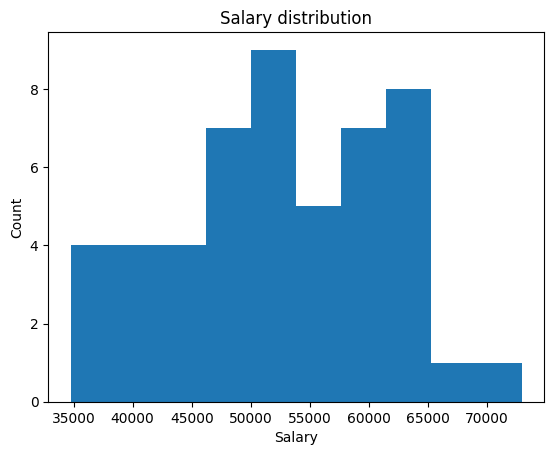

In [8]:
mean_salary = df['salary'].mean()
median_salary = df['salary'].median()
print('Mean salary:', mean_salary)
print('Median salary:', median_salary)
plt.figure()
plt.hist(df['salary'], bins=10)
plt.title('Salary distribution')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.show()

## 4. Measures of Spread — Solutions
**A7.** SD with ddof=0 (population) and ddof=1 (sample): If this is a sample from a larger population, report `ddof=1` (Bessel's correction) for an unbiased variance estimate.

**A8.** MAD about mean vs median (median-based MAD is typically more robust to outliers):

In [12]:
sd_pop = df['salary'].std(ddof=0)
sd_samp = df['salary'].std(ddof=1)
sd_pop, sd_samp

(np.float64(9106.664353193093), np.float64(9199.120168760915))

In [27]:
def mad_cal(x):
    return np.mean(np.abs(x-np.mean(x)))

mad_mean = mad_cal(df['salary'])
print(mad_mean)

## There's an Easter egg if you can find out how to calculate the median absolute deviation, let me know if you got it in the comments of my video

7579.455072000001


## 5. Quartiles and IQR — Solutions

In [ ]:
q1 = df['age'].quantile(0.25)
q2 = df['age'].quantile(0.50)
q3 = df['age'].quantile(0.75)
iqr = q3 - q1
q1, q2, q3, iqr

In [ ]:
plt.figure()
plt.boxplot(df['age'].values)
plt.title('Age — Boxplot')
plt.ylabel('Age')
plt.show()

## 6. Mini-Project — Solutions
Department-level comparison of salary and orders_per_day:

In [ ]:
grouped = df.groupby('department')
summary = grouped['salary'].agg(
    mean='mean', median='median', sd=lambda s: s.std(ddof=1)
)
summary['mad_med'] = grouped['salary'].apply(lambda s: np.mean(np.abs(s - s.median())))
summary

In [ ]:
orders_q = grouped['orders_per_day'].quantile([0.25, 0.5, 0.75]).unstack()
orders_q.columns = ['Q1','Q2','Q3']
orders_q['IQR'] = orders_q['Q3'] - orders_q['Q1']
orders_q

## 7. Wrap-up — Notes
- In skewed distributions, median is often a better 'typical' value than mean.
- Use `ddof=1` for sample SD when estimating population variability.
- IQR is robust to outliers and pairs naturally with boxplots.